In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load dataset
dataset = pd.read_csv('lstm_nox.csv')
dataset = dataset.fillna(dataset.mean())
data = dataset.values
data = data.astype('float32')

In [3]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

In [4]:
# Split data into training and testing sets
train_size = int(len(data) * 0.67)
test_size = len(data) - train_size
train, test = data[0:train_size,:], data[train_size:len(data),:]

In [5]:
# Create function to create LSTM model
def create_model():
    model = Sequential()
    model.add(LSTM(60, input_shape=(1, 1)))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [6]:
# Reshape input data to be 3-dimensional
X_train = np.reshape(train, (train.shape[0], 1, train.shape[1]))
X_test = np.reshape(test, (test.shape[0], 1, test.shape[1]))

In [7]:
# Create and fit the LSTM model
model = create_model()
model.fit(X_train, train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
1039/1039 - 2s - loss: 4.7645e-04 - 2s/epoch - 2ms/step
Epoch 2/100
1039/1039 - 1s - loss: 2.7811e-05 - 920ms/epoch - 886us/step
Epoch 3/100
1039/1039 - 1s - loss: 1.8150e-05 - 933ms/epoch - 898us/step
Epoch 4/100
1039/1039 - 1s - loss: 1.4087e-05 - 929ms/epoch - 894us/step
Epoch 5/100
1039/1039 - 1s - loss: 1.4863e-05 - 911ms/epoch - 877us/step
Epoch 6/100
1039/1039 - 1s - loss: 1.4516e-05 - 917ms/epoch - 882us/step
Epoch 7/100
1039/1039 - 1s - loss: 1.0755e-05 - 931ms/epoch - 896us/step
Epoch 8/100
1039/1039 - 1s - loss: 1.1650e-05 - 929ms/epoch - 894us/step
Epoch 9/100
1039/1039 - 1s - loss: 1.2482e-05 - 933ms/epoch - 898us/step
Epoch 10/100
1039/1039 - 1s - loss: 1.2641e-05 - 914ms/epoch - 880us/step
Epoch 11/100
1039/1039 - 1s - loss: 1.1102e-05 - 932ms/epoch - 897us/step
Epoch 12/100
1039/1039 - 1s - loss: 1.0984e-05 - 927ms/epoch - 892us/step
Epoch 13/100
1039/1039 - 1s - loss: 1.1924e-05 - 910ms/epoch - 875us/step
Epoch 14/100
1039/1039 - 1s - loss: 1.2590e-05 - 923

In [8]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

16/16 [==============================] - 0s 1ms/step


In [9]:
train_predict = scaler.inverse_transform(train_predict)
train = scaler.inverse_transform(train)
test_predict = scaler.inverse_transform(test_predict)
test = scaler.inverse_transform(test)


In [10]:
from sklearn.metrics import r2_score
import math
from sklearn.metrics import mean_squared_error
train_rmse = np.sqrt(mean_squared_error(train, train_predict))
test_rmse = np.sqrt(mean_squared_error(test, test_predict))
print('R2 Score_train:', r2_score(train, train_predict))
print('R2 Score_test:', r2_score(test, test_predict))

print('Train RMSE: %.2f' % train_rmse)
print('Test RMSE: %.2f' % test_rmse)

R2 Score_train: 0.9969256219924946
R2 Score_test: 0.9847127291661674
Train RMSE: 0.81
Test RMSE: 4.37


In [11]:
df=pd.DataFrame({'Actual':train.tolist(),'Predicted from lstm':train_predict.tolist()})
df.to_excel('lstm_NOx.xlsx')
df

,Actual,Predicted from lstm
0,[51.099998474121094],[51.495731353759766]
1,[50.47999954223633],[50.880615234375]
2,[55.38999938964844],[55.752864837646484]
3,[48.529998779296875],[48.946258544921875]
4,[44.040000915527344],[44.494110107421875]
...,...,...
1034,[79.83999633789062],[80.01986694335938]
1035,[59.599998474121094],[59.931793212890625]
1036,[60.25],[60.57706069946289]
1037,[49.0099983215332],[49.42236328125]


In [12]:
df=pd.DataFrame({'Actual':test.tolist(),'Predicted from lstm':test_predict.tolist()})
df.to_excel('lstm_NOx_test.xlsx')
df

,Actual,Predicted from lstm
0,[37.540000915527344],[38.05467987060547]
1,[34.15999984741211],[34.70950698852539]
2,[46.689998626708984],[47.121437072753906]
3,[62.720001220703125],[63.0291633605957]
4,[79.04000091552734],[79.22642517089844]
...,...,...
507,[4.800000190734863],[5.797840118408203]
508,[5.960000038146973],[6.933809280395508]
509,[5.480000019073486],[6.46367883682251]
510,[3.0799999237060547],[4.114628314971924]


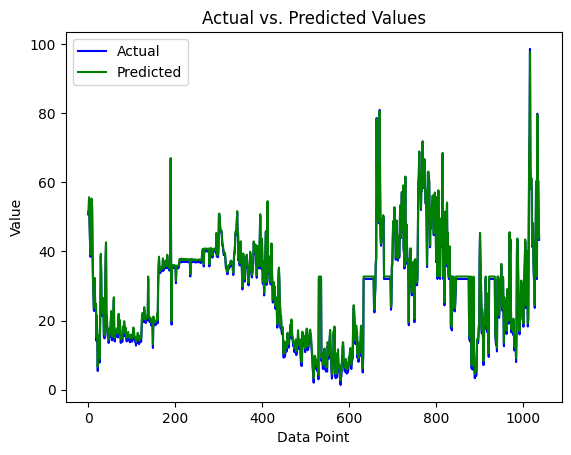

In [11]:
import matplotlib.pyplot as plt



# x-axis values (assuming 0-based indexing)
x_values = range(len(train))

# plot actual values as a blue line
plt.plot(x_values, train, color='blue', label='Actual')

# plot predicted values as a green line
plt.plot(x_values, train_predict, color='green', label='Predicted')

# set plot title and labels
plt.title('Actual vs. Predicted Values')
plt.xlabel('Data Point')
plt.ylabel('Value')

# show legend
plt.legend()

# display plot
plt.show()

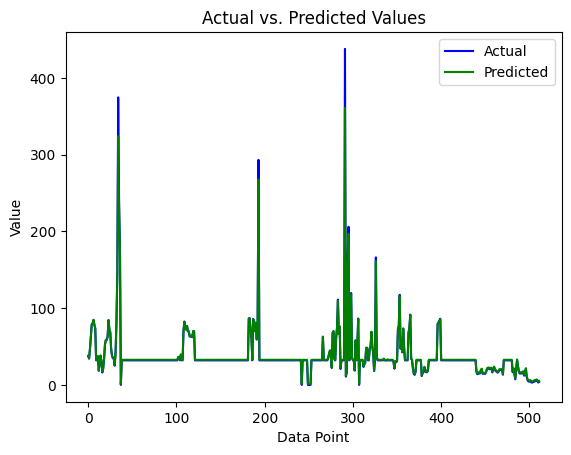

In [12]:
import matplotlib.pyplot as plt



# x-axis values (assuming 0-based indexing)
x_values = range(len(test))

# plot actual values as a blue line
plt.plot(x_values, test, color='blue', label='Actual')

# plot predicted values as a green line
plt.plot(x_values, test_predict, color='green', label='Predicted')

# set plot title and labels
plt.title('Actual vs. Predicted Values')
plt.xlabel('Data Point')
plt.ylabel('Value')

# show legend
plt.legend()

# display plot
plt.show()